# Análise de Avaliações de Cervejas

## Descrição do Projeto
Este projeto explora uma base de dados com mais de 1,5 milhão de avaliações de cervejas feitas por usuários. As avaliações abordam diversos aspectos sensoriais, como aroma, aparência, sabor e sensação, além de informações detalhadas sobre as cervejarias e os estilos de cerveja. A base é ideal para análises de tendências de consumo, preferências de estilos e insights sobre o comportamento dos consumidores de cervejas.

## Objetivos
- **Analisar a qualidade das cervejas** com base em diferentes critérios sensoriais.
- **Identificar tendências** no consumo de cervejas.
- **Construir um modelo preditivo** para estimar a nota geral da cerveja (`review_overall`) com base nas avaliações sensoriais.

## Estrutura dos Dados
A base de dados contém as seguintes variáveis:

| Variável                  | Descrição                                         |
|---------------------------|---------------------------------------------------|
| **brewery_id**            | Identificador único da cervejaria.                |
| **brewery_name**          | Nome da cervejaria.                              |
| **review_time**           | Data e hora da avaliação.                        |
| **review_overall**        | Nota geral da cerveja (escala de 1 a 5).        |
| **review_aroma**          | Avaliação do aroma (escala de 1 a 5).           |
| **review_appearance**     | Avaliação da aparência (escala de 1 a 5).       |
| **review_profilename**    | Nome de usuário do avaliador.                    |
| **beer_style**            | Estilo ou tipo de cerveja.                       |
| **review_palate**         | Avaliação da sensação na boca (escala de 1 a 5).|
| **review_taste**          | Avaliação do sabor (escala de 1 a 5).           |
| **beer_name**             | Nome da cerveja.                                 |
| **beer_abv**              | Teor alcoólico da cerveja (ABV - Alcohol by Volume). |
| **beer_beerid**           | Identificador único da cerveja.                  |

Com essa estrutura, é possível realizar uma análise detalhada da relação entre os diferentes aspectos sensoriais e as notas atribuídas pelos consumidores, proporcionando insights valiosos sobre a indústria cervejeira.

## Metodologia
1. **Importação de Bibliotecas**: Utilizamos bibliotecas como `pandas`, `numpy`, `sklearn` e `matplotlib` para manipulação de dados, modelagem e visualização.
2. **Carregamento dos Dados**: Os dados foram carregados de um arquivo CSV e armazenados em um DataFrame.
3. **Preparação dos Dados**:
   - Seleção de características e variável alvo (`review_overall`).
   - Conversão da coluna `review_time` para o formato datetime (opcional).
   - Classificação de avaliações em categorias textuais:
     - Os valores de 1 a 5 foram interpretados da seguinte forma:
       - `1.0`: "Muito ruim"
       - `1.5`: "Ruim"
       - `2.0`: "Regular"
       - `2.5`: "Razoável"
       - `3.0`: "Satisfatório"
       - `3.5`: "Agradável"
       - `4.0`: "Muito bom"
       - `4.5`: "Excelente"
       - `5.0`: "Perfeito"
4. **Amostragem dos Dados**: Apenas 10% do total de dados foram utilizados para análise, para garantir uma amostra representativa, mantendo o desempenho computacional.
5. **Divisão dos Dados**: O conjunto de dados foi dividido em conjuntos de treino e teste (80/20).
6. **Criação e Treinamento do Modelo**: Um modelo de regressão linear foi criado e treinado para prever a nota geral da cerveja.
7. **Avaliação do Modelo**: O modelo foi avaliado utilizando as métricas de erro quadrático médio (MSE) e o coeficiente de determinação (R²).
8. **Previsões**: Foi criada uma função para prever a nota geral com base em entradas sensoriais.
9. **Visualização dos Resultados**: Um gráfico de dispersão foi gerado para comparar os valores reais e previstos.

## Resultados
O modelo conseguiu prever a nota geral com uma precisão razoável, proporcionando insights sobre a relação entre as características sensoriais e a avaliação geral da cerveja.

## Conclusão
Este projeto oferece uma visão abrangente sobre as avaliações de cervejas, permitindo que tanto os consumidores quanto os produtores entendam melhor as preferências e tendências no mercado.

## Autor
[**Fernando Nonato**](https://github.com/Cyberfn)  
<a href="https://github.com/Cyberfn"><img src="https://github.com/Cyberfn.png" width="150" height="150" /></a>

# 1 - Importando Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers, models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2 - Carregando os Dados

In [2]:
df = pd.read_csv('../input/beerreviews/beer_reviews.csv')
df2 = df.sample(frac=0.1, random_state=42)

# 3 - Visualização de Dados das Avaliações de Cervejas

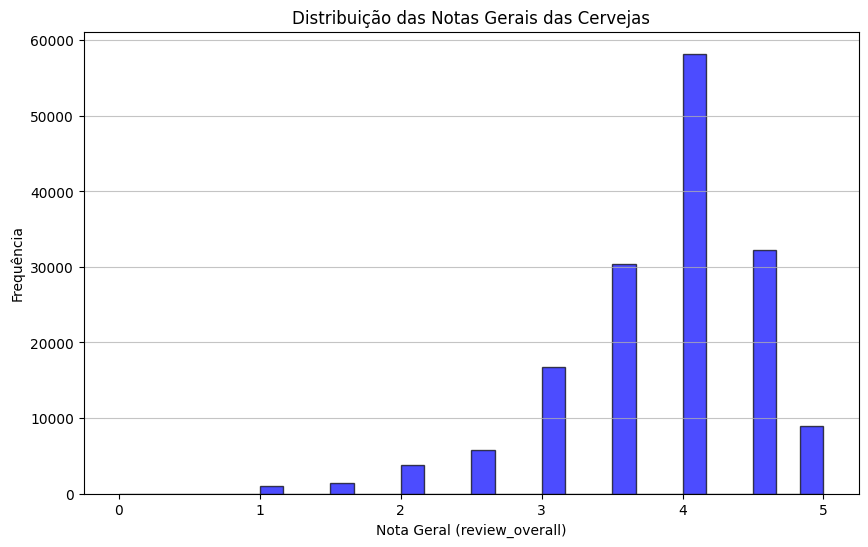

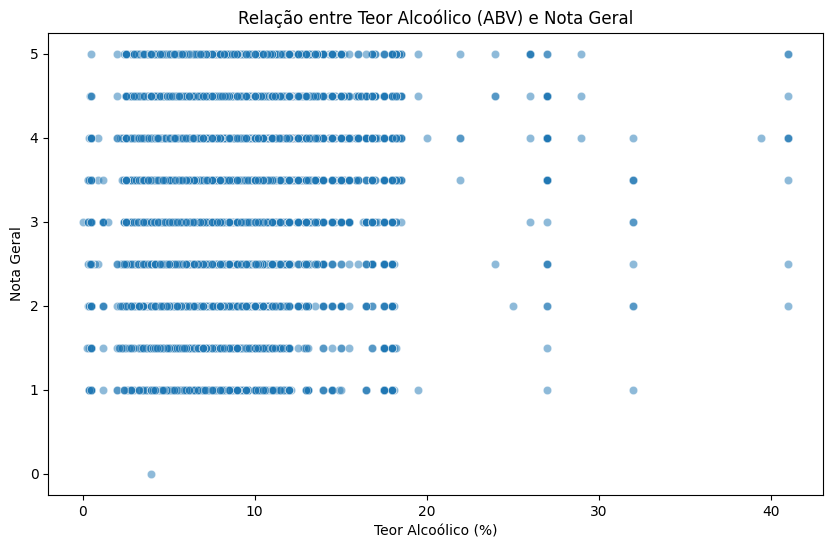

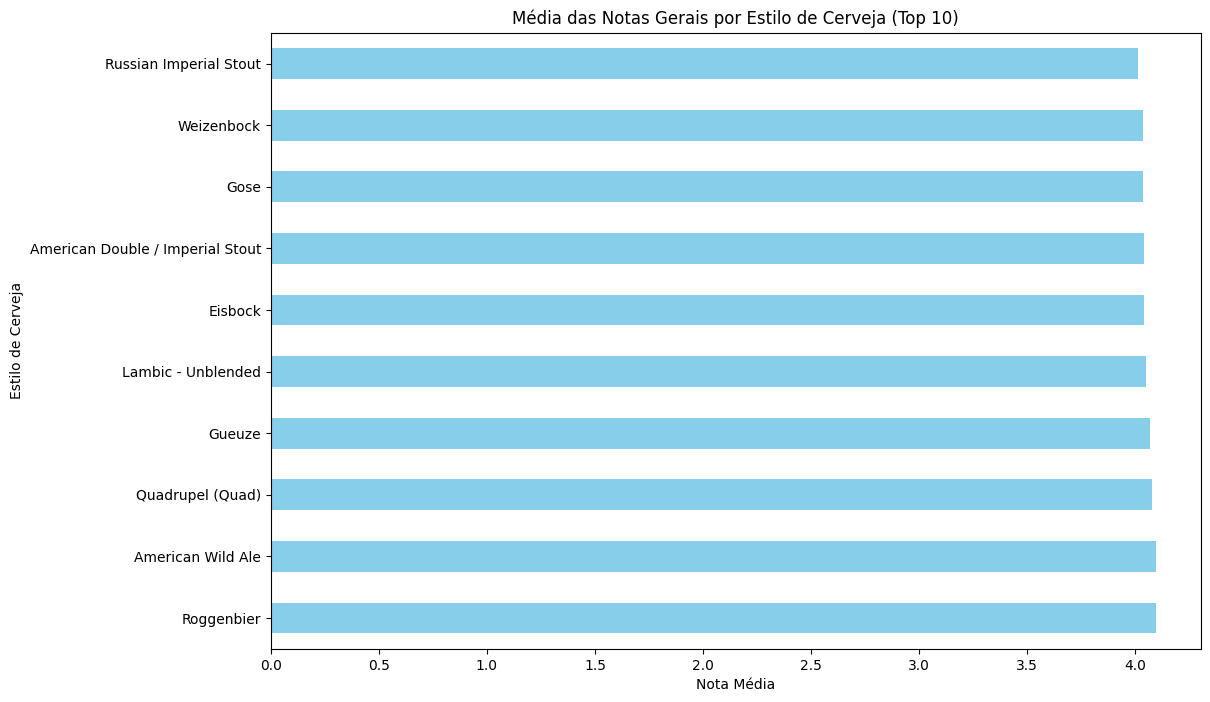

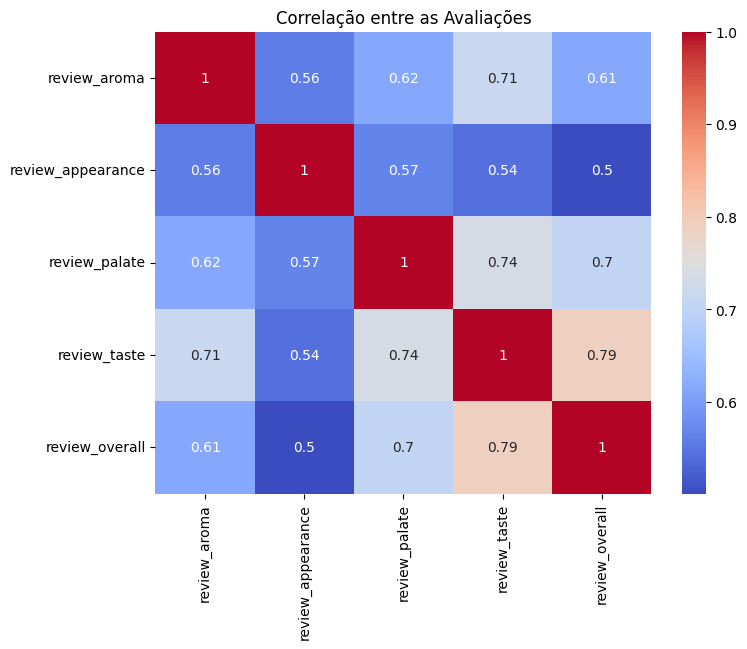

In [3]:
# Criando Histograma das Avaliações
plt.figure(figsize=(10, 6))
plt.hist(df2['review_overall'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribuição das Notas Gerais das Cervejas')
plt.xlabel('Nota Geral (review_overall)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Gráfico de dispersão - Relação entre teor alcoólico (ABV) e nota geral
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beer_abv', y='review_overall', data=df2, alpha=0.5)
plt.title('Relação entre Teor Alcoólico (ABV) e Nota Geral')
plt.xlabel('Teor Alcoólico (%)')
plt.ylabel('Nota Geral')
plt.show()

# Gráfico de barras - Média das avaliações por estilo de cerveja
plt.figure(figsize=(12, 8))
avg_review_by_style = df2.groupby('beer_style')['review_overall'].mean().sort_values(ascending=False).head(10)
avg_review_by_style.plot(kind='barh', color='skyblue')
plt.title('Média das Notas Gerais por Estilo de Cerveja (Top 10)')
plt.xlabel('Nota Média')
plt.ylabel('Estilo de Cerveja')
plt.show()

# Heatmap - Correlação entre as avaliações
corr = df2[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre as Avaliações')
plt.show()

# 4 - Selecionando Características e Alvo

In [4]:
features = df2[['review_taste']]
target = df2['review_overall']

# 5 - Convertendo para datetime

In [5]:
df2['review_time'] = pd.to_datetime(df2['review_time'], unit='s')

# 6 - Dividindo os Dados

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Treinando modelo em binário
target_binary = (target > 3.0).astype(int)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(features, target_binary, test_size=0.2, random_state=42)

# 7 - Modelos de Aprendizagem de Máquina Supervisionado

## 7.1 - Regressão Linear

Regressão Linear - MSE: 0.20, R²: 0.62, Acurácia: 0.79 



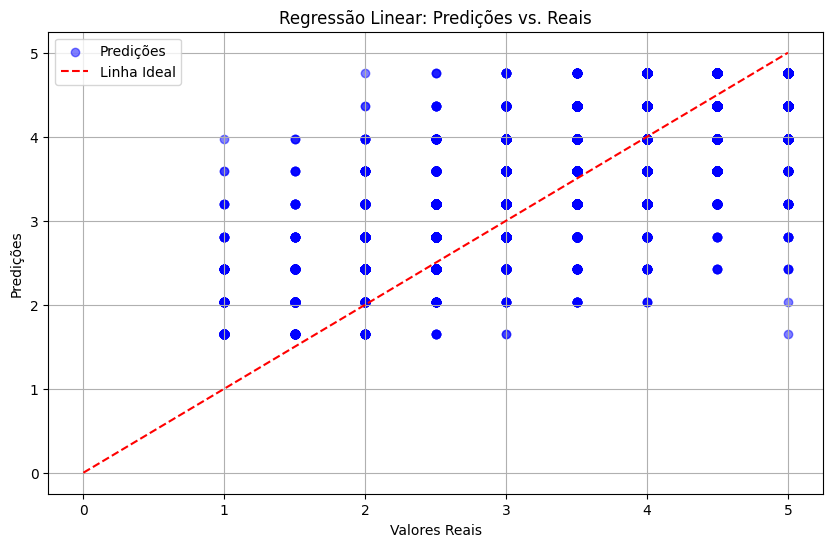

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Avaliando desempenho
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(linear_predictions).astype(int))

print(f'Regressão Linear - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}, Acurácia: {linear_accuracy:.2f} \n')

# Gráfico para Regressão Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Regressão Linear: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.2 - Regressão Logística

Regressão Logística - MSE: 0.10, R²: 0.34, Acurácia: 0.90



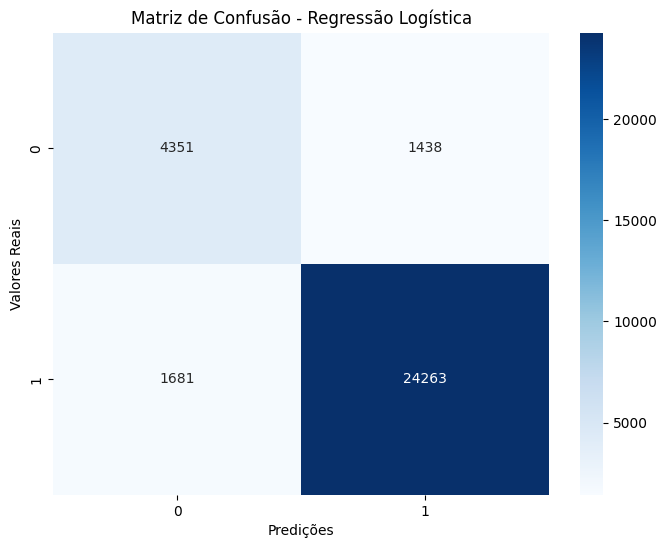

In [9]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)
logistic_predictions = logistic_model.predict(X_test_logistic)

# Avaliando desempenho
logistic_mse = mean_squared_error(y_test_logistic, logistic_predictions)
logistic_r2 = r2_score(y_test_logistic, logistic_predictions)
logistic_accuracy = accuracy_score(y_test_logistic, logistic_predictions)

print(f'Regressão Logística - MSE: {logistic_mse:.2f}, R²: {logistic_r2:.2f}, Acurácia: {logistic_accuracy:.2f}\n')

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_logistic, logistic_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()

## 7.3 - Decision Tree

Decision Tree Regressor - MSE: 0.19, R²: 0.63, Acurácia: 0.80



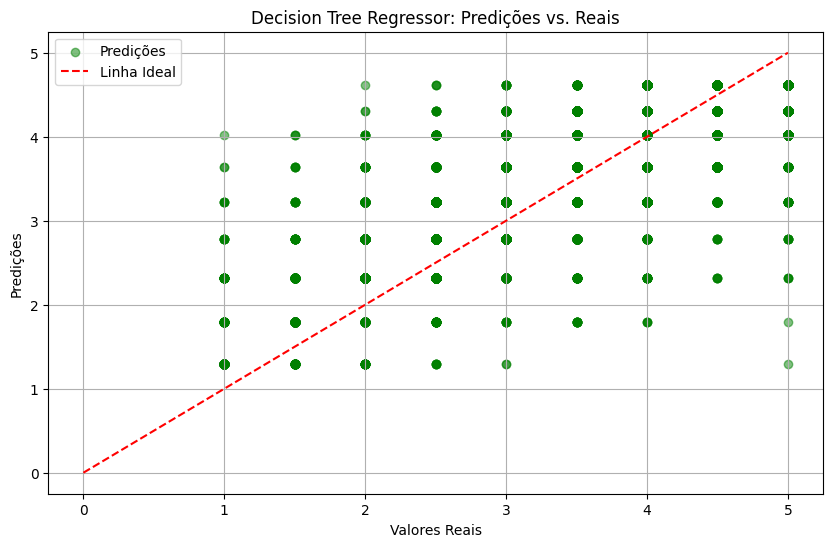

In [10]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Avaliando desempenho
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(decision_tree_predictions).astype(int))

print(f"Decision Tree Regressor - MSE: {decision_tree_mse:.2f}, R²: {decision_tree_r2:.2f}, Acurácia: {decision_tree_accuracy:.2f}\n")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, color='green', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Decision Tree Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.3.2 - Decision Tree Classifier

In [11]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_logistic, y_train_logistic)

# Fazendo previsões
decision_tree_predictions = decision_tree_classifier.predict(X_test_logistic)

# Avaliando o desempenho
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_accuracy = accuracy_score(y_test_logistic, decision_tree_predictions)


print(f"Decision Tree Classifier - MSE: {decision_tree_mse:.2f}, R²: {decision_tree_r2:.2f}, Acurácia: {decision_tree_accuracy:.2f}\n")

Decision Tree Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90



## 7.4 - Random Forest

Random Forest Regressor - MSE: 0.19, R²: 0.63, Acurácia: 0.80 



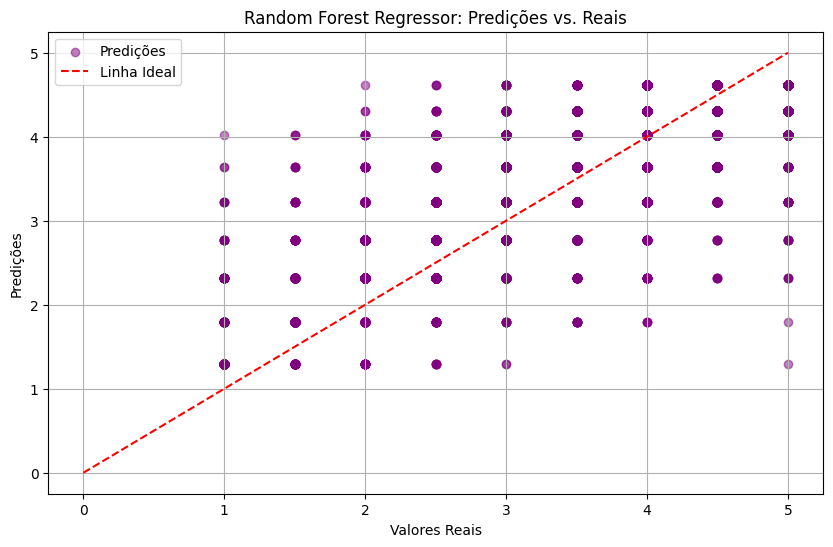

In [12]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# Avaliando desempenho
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
random_forest_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(random_forest_predictions).astype(int))

print(f'Random Forest Regressor - MSE: {random_forest_mse:.2f}, R²: {random_forest_r2:.2f}, Acurácia: {random_forest_accuracy:.2f} \n')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, color='purple', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Random Forest Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.4.2 - Random Forest Classifier

In [13]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_logistic, y_train_logistic)
random_forest_classifier_predictions = random_forest_classifier.predict(X_test_logistic)

random_forest_classifier_mse = mean_squared_error(y_test, random_forest_classifier_predictions)
random_forest_classifier_r2 = r2_score(y_test, random_forest_classifier_predictions)
random_forest_classifier_accuracy = accuracy_score(y_test_logistic, random_forest_classifier_predictions)

print(f'Random Forest Classifier - MSE: {random_forest_classifier_mse:.2f}, R²: {random_forest_classifier_r2:.2f}, Acurácia: {random_forest_classifier_accuracy:.2f} \n')

Random Forest Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



## 7.5 - K-Nearest Neighbors (KNN) Regressor

KNN - MSE: 0.23, R²: 0.56, Acurácia: 0.80 



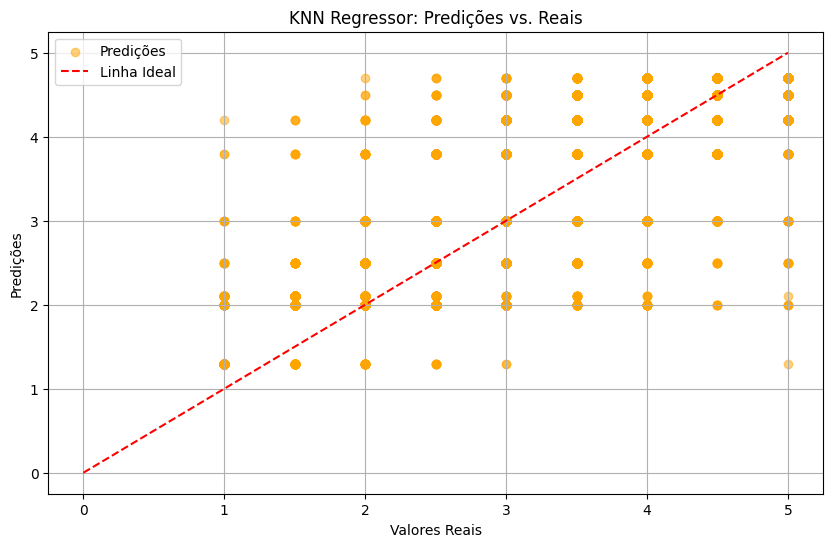

In [14]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Avaliando desempenho
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(knn_predictions).astype(int))

print(f'KNN - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, Acurácia: {knn_accuracy:.2f} \n')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='orange', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('KNN Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.5.2 - K-Nearest Neighbors (KNN) Classifier

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_logistic, y_train_logistic)
knn_classifier_predictions = knn_classifier.predict(X_test_logistic)

knn_classifier_mse = mean_squared_error(y_test, knn_classifier_predictions)
knn_classifier_r2 = r2_score(y_test, knn_classifier_predictions)
knn_classifier_accuracy = accuracy_score(y_test_logistic, knn_classifier_predictions)

print(f'KNN Classifier - MSE: {knn_classifier_mse:.2f}, R²: {knn_classifier_r2:.2f}, Acurácia: {knn_classifier_accuracy:.2f} \n')

KNN Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



## 7.6 - Support Vector Classifier (SVC)

In [16]:
svc_model = SVC()
svc_model.fit(X_train_logistic, y_train_logistic)
svc_predictions = svc_model.predict(X_test_logistic)

svc_mse = mean_squared_error(y_test, svc_predictions)
svc_r2 = r2_score(y_test, svc_predictions)
svc_accuracy = accuracy_score(y_test_logistic, svc_predictions)

print(f'Support Vector Classifier - MSE: {svc_mse:.2f}, R²: {svc_r2:.2f}, Acurácia: {svc_accuracy:.2f} \n')

Support Vector Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



# 8 - Modelos de Aprendizagem de Máquina Não Supervisionada

## 8.1 - K-Means

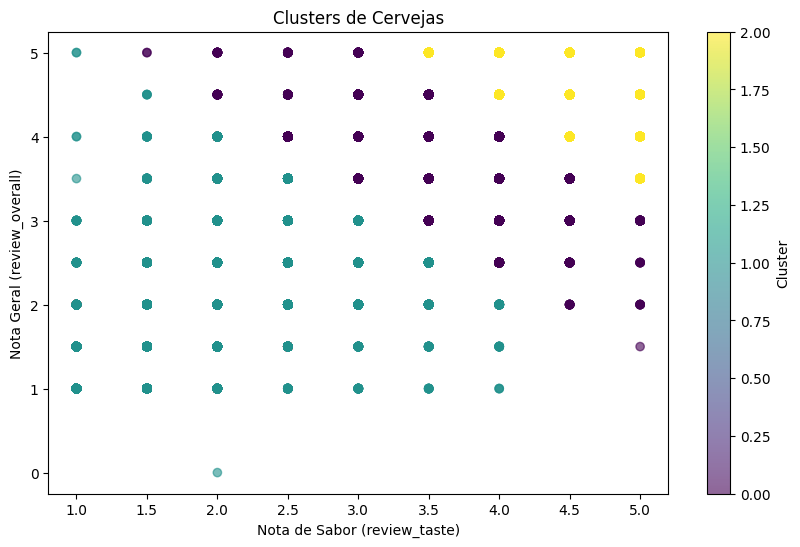

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df2['cluster'] = kmeans.fit_predict(df2[['review_taste', 'review_overall']])

# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df2['review_taste'], df2['review_overall'], c=df2['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters de Cervejas')
plt.xlabel('Nota de Sabor (review_taste)')
plt.ylabel('Nota Geral (review_overall)')
plt.colorbar(label='Cluster')
plt.show()

## 8.2 - Rede Neural 

Epoch 1/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4981 - val_loss: 0.2034
Epoch 2/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1964 - val_loss: 0.1996
Epoch 3/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1925 - val_loss: 0.1922
Epoch 4/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1917 - val_loss: 0.1924
Epoch 5/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1895 - val_loss: 0.1915
Epoch 6/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1901 - val_loss: 0.1931
Epoch 7/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1908 - val_loss: 0.1922
Epoch 8/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1900 - val_loss: 0.1921
Epoch 9/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1902 - val_loss: 0.1918
Epoch 10/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1920 - val_loss: 0.1919
Epoch 11/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1881 - val_loss: 0.1917
Epoch 12/100
3174/3

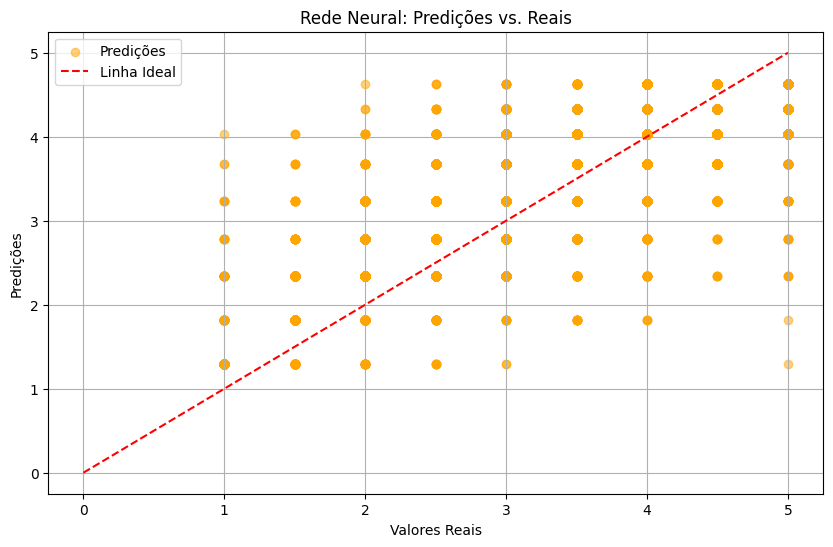

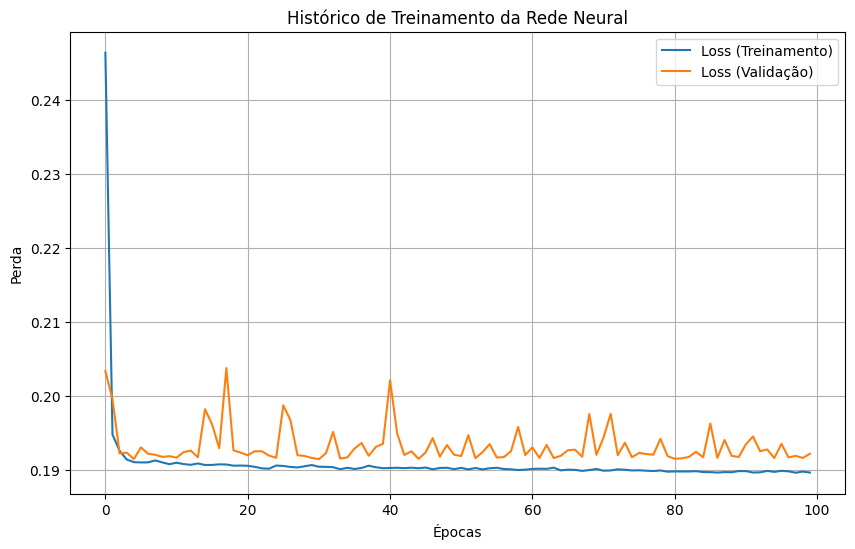

In [18]:
nn_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Camada de entrada
    layers.Dense(64, activation='relu'),  # Camada oculta
    layers.Dense(32, activation='relu'),  # Camada oculta
    layers.Dense(1)  # Camada de saída
])

# Compilando o modelo
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando a rede neural
nn_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Fazendo previsões
nn_predictions = nn_model.predict(X_test)

# Avaliando desempenho
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
nn_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(nn_predictions).astype(int))

print(f'Rede Neural - MSE: {nn_mse:.2f}, R²: {nn_r2:.2f}, Acurácia: {nn_accuracy:.2f}\n')

# Gráfico para Rede Neural
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, color='orange', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Rede Neural: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

# Visualizando o histórico de treinamento
plt.figure(figsize=(10, 6))
plt.plot(nn_history.history['loss'], label='Loss (Treinamento)')
plt.plot(nn_history.history['val_loss'], label='Loss (Validação)')
plt.title('Histórico de Treinamento da Rede Neural')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid()
plt.show()